# Sentiment Analysis

## Teams:

Name: Kapil Madan <br>
E-mail: madank@vmware.com <br>
BU: VES(ROCS)

## Summary:

The text from the file was cleaned and preprocessed. I have used Glove embeddings which will help in increasing model accuracy.
Finally a LSTM model was built for prediction

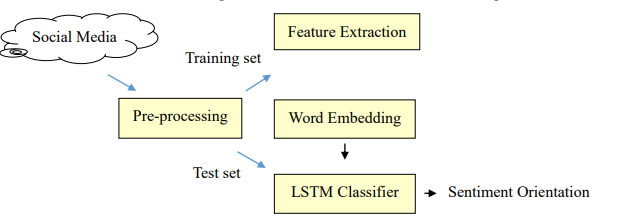

The steps involved in whole process are as follows: <br>
1. Load in and visualize the data
2. Data Processing — convert to lower case
3. Data Processing — Format Words and remove unwamted characters
4. Data Processing — Replace contraction with their longer forms
5. Data Processing — Create list of reviews
6. Tokenize — Create Vocab to Int mapping dictionary
7. Tokenize — Encode the words
8. Tokenize — Encode the labels
9. Analyze Reviews Length
10. Padding / Truncating the remaining data
11. Training, Validation Dataset Split
12. Dataloaders and Batching
13. Define the LSTM Network Architecture
14. Training the Network
15. Model Evaluation

## Feature Engineering

1. Divided text into tokens and created a vocabulary of words used in reviews 
2. Used Glove embeddings of 300 dimensions and mapped them to vocabulary

## Training Methodology

Used LSTM model for training

##### Model Architecture:

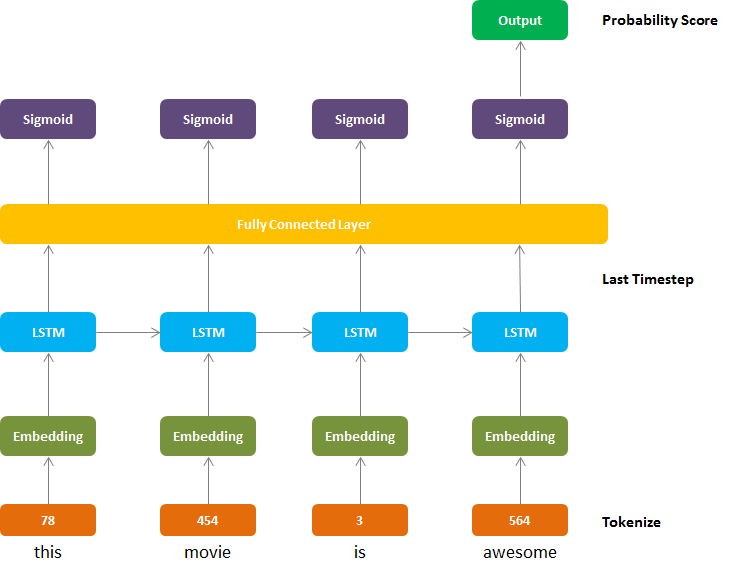

### Import Libraries

In [35]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN, Embedding, Dense, Input, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import keras.optimizers

### Load and Visualize Data

In [36]:
train = pd.read_csv('train.csv')
train.head()

,label,text
0,Negative,No one cares about marketing slides - a techni...
1,Positive,Are all three hosts providing storage/capacity...
2,Negative,would loved to had managed to get down to the ...
3,Negative,Vending machine at work is out of Dasani water...
4,Positive,"RT @VMwareEdu: Paul Maritz, CEO and President ..."


Text(0.5, 1.0, 'Dataset labels distribution')

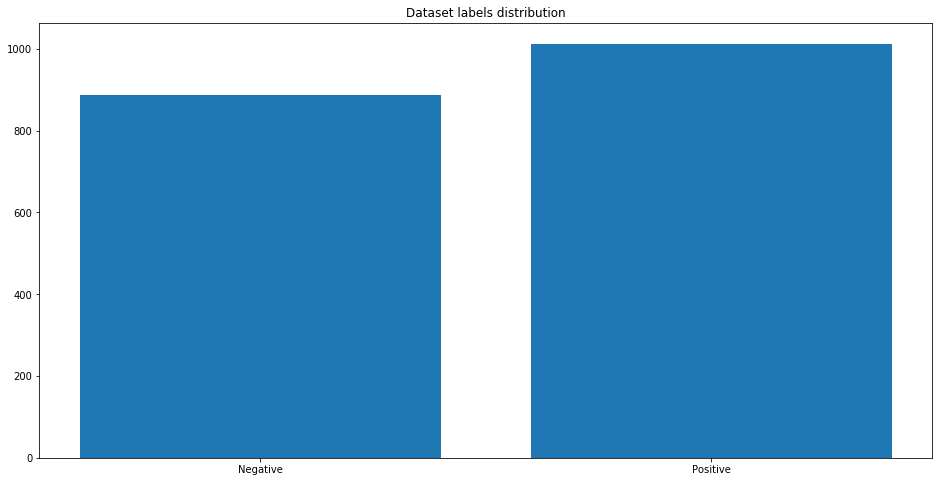

In [37]:
# Check if data is balanced or not

target_cnt = Counter(train['label'])

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribution")

In [38]:
sentiment = train['text'].tolist()
sentiment

['No one cares about marketing slides - a technical HOW TO is a lot better',
 "Are all three hosts providing storage/capacity? Or is one a witness? If all three have capacity drives, what'd you do with the witness? (and with them being NUCs, just how are you handling capacity and cache?)  I'm really wondering about two-node performance, as I currently have three hosts but one of them has FreeNAS virtualized and all the disk slots on that host are dedicated for that. I could add a DAS shelf or something, but I am very curious what it's like running v SAN with both capacity/cache only attached to two nodes and as far as the cluster is aware the third host is strictly only a VM host. And if that's where I'm heading, is the StarWind route going to offer something for performance and reliability with two storage nodes that VMware vSAN wouldn't be able to match with only two storage nodes?",
 "would loved to had managed to get down to the Camden Crawl show, but it's a leetle too far away",
 

In [39]:
label = train['label'].tolist()
label

['Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',

### Data Preprocessing

1. Defined methods for data contraction and for cleaning text which includes steps like- text tokenization, converting it into lower case.
2. Created a vocabulary of words and made a mapping of vocab to int<br>
3. The output is a list of reviews in the form of tokenized words<br>
4. Used GLove embeddings with dimensions of 300 for embedding words in vocab
5. Encoded all the words and labels
6. Analyzing review legth and padded and truccated data. Review length of 200 words are chosen. Pre paddig and post truncated    method are chosen


In [40]:
# remove contractions
def decontracted(phrase):
    if "'" in phrase:
        # specific
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
    return phrase

text = "I should've gone to dentist so my teeth wouldn't hurt"
text1 = "But I am good now"
print(decontracted(text))
print(decontracted(text1))

I should have gone to dentist so my teeth would not hurt
But I am good now


In [41]:
def clean_text(text):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        # Remove the contractions
        for word in text:
            new_text.append(decontracted(word))
        # Recreate the sentence
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)
    
    # Remove stop words
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)

    text = word_tokenize(text)
    return text

In [42]:
senti_clear = []
for sents in sentiment:
    senti_clear.append(clean_text(sents))

senti_clear

[['one', 'cares', 'marketing', 'slides', 'technical', 'lot', 'better'],
 ['three',
  'hosts',
  'providing',
  'storage/capacity',
  'one',
  'witness',
  'three',
  'capacity',
  'drives',
  'would',
  'witness',
  'nucs',
  'handling',
  'capacity',
  'cache',
  'really',
  'wondering',
  'two',
  'node',
  'performance',
  'currently',
  'three',
  'hosts',
  'one',
  'freenas',
  'virtualized',
  'disk',
  'slots',
  'host',
  'dedicated',
  'could',
  'add',
  'das',
  'shelf',
  'something',
  'curious',
  'like',
  'running',
  'v',
  'san',
  'capacity/cache',
  'attached',
  'two',
  'nodes',
  'far',
  'cluster',
  'aware',
  'third',
  'host',
  'strictly',
  'vm',
  'host',
  'heading',
  'starwind',
  'route',
  'going',
  'offer',
  'something',
  'performance',
  'reliability',
  'two',
  'storage',
  'nodes',
  'vmware',
  'vsan',
  'would',
  'able',
  'match',
  'two',
  'storage',
  'nodes'],
 ['would',
  'loved',
  'managed',
  'get',
  'camden',
  'crawl',
  'show'

In [43]:
len(senti_clear)

1900

In [44]:
words =[]
for sents in senti_clear:
    for wrds in sents:
        words.append(wrds)
words

['one',
 'cares',
 'marketing',
 'slides',
 'technical',
 'lot',
 'better',
 'three',
 'hosts',
 'providing',
 'storage/capacity',
 'one',
 'witness',
 'three',
 'capacity',
 'drives',
 'would',
 'witness',
 'nucs',
 'handling',
 'capacity',
 'cache',
 'really',
 'wondering',
 'two',
 'node',
 'performance',
 'currently',
 'three',
 'hosts',
 'one',
 'freenas',
 'virtualized',
 'disk',
 'slots',
 'host',
 'dedicated',
 'could',
 'add',
 'das',
 'shelf',
 'something',
 'curious',
 'like',
 'running',
 'v',
 'san',
 'capacity/cache',
 'attached',
 'two',
 'nodes',
 'far',
 'cluster',
 'aware',
 'third',
 'host',
 'strictly',
 'vm',
 'host',
 'heading',
 'starwind',
 'route',
 'going',
 'offer',
 'something',
 'performance',
 'reliability',
 'two',
 'storage',
 'nodes',
 'vmware',
 'vsan',
 'would',
 'able',
 'match',
 'two',
 'storage',
 'nodes',
 'would',
 'loved',
 'managed',
 'get',
 'camden',
 'crawl',
 'show',
 'leetle',
 'far',
 'away',
 'vending',
 'machine',
 'work',
 'dasani',
 

In [45]:
cnt_words = Counter(words)
cnt_words

Counter({'one': 145,
         'cares': 1,
         'marketing': 4,
         'slides': 2,
         'technical': 8,
         'lot': 33,
         'better': 49,
         'three': 7,
         'hosts': 58,
         'providing': 3,
         'storage/capacity': 1,
         'witness': 2,
         'capacity': 11,
         'drives': 10,
         'would': 195,
         'nucs': 1,
         'handling': 1,
         'cache': 5,
         'really': 82,
         'wondering': 7,
         'two': 34,
         'node': 8,
         'performance': 37,
         'currently': 16,
         'freenas': 2,
         'virtualized': 4,
         'disk': 32,
         'slots': 3,
         'host': 92,
         'dedicated': 5,
         'could': 81,
         'add': 22,
         'das': 2,
         'shelf': 3,
         'something': 60,
         'curious': 6,
         'like': 171,
         'running': 67,
         'v': 17,
         'san': 24,
         'capacity/cache': 1,
         'attached': 2,
         'nodes': 12,
         'far

In [46]:
vocab = len(cnt_words)
EMBEDDING_SIZE =300
NUM_CLASSES =2

#### Word Embeddings

Used GLove Embeddings and used embeddings of 300 dimension

In [47]:
# Load GloVe's embeddings
embeddings_index = {}
with open('C:/Users/madank/Documents/AI ML/Neural Networks/Recurrent Neural Networks/Jupyter Codebase/1 Dimensional Convulations/1d-cnn-rnn-notebook/storage/word-embeddings/glove.840B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 2196017


In [48]:
left_out =[]
for word, i in cnt_words.items():
    if word not in embeddings_index:
        left_out.append(word)
left_out

['storage/capacity',
 'capacity/cache',
 'vmwareedu',
 'vmwarelightwave',
 'inf4946',
 'virtualblocks',
 '//bit',
 'ly/2hm5nkg',
 '//fb',
 'me/11kf29nfj',
 '3/12/2020',
 '11/5/2021',
 'funrun',
 'vforumonline',
 'ly/2o8bdph',
 'vcsa',
 '2gbps',
 '//ow',
 'ly/ix4la',
 'vmlive',
 'bencasselman',
 'zero/thin',
 '10302608',
 'r710',
 'x5670',
 '7u1',
 'r510',
 'r640',
 'homelab',
 'x200b',
 '\\n\\nin',
 'information\\\\instructions',
 'kmip',
 'spoonen',
 'mthightechjobs',
 'ly/2y8f87e',
 'vmrc',
 'br/',
 'andybanta',
 'ericschmidt',
 'ly/vaeje',
 'themandalorian',
 'migratevsan',
 'ly/2ljz1ff',
 'symvision',
 'vmwareevents',
 'emcworld',
 'antderosa',
 'alanrenouf',
 'ly/2majmud',
 'guitted',
 'ly/2edpl0i',
 'jedimt',
 'win2k8',
 'vapp',
 'ishell',
 '\\nit',
 '7/internet',
 'airwatch',
 'radicati',
 'notop',
 'ly/1067qc',
 'ashleymcnamara',
 'lynxbat',
 'anovasousvide',
 'sensentivity',
 'herrod',
 'ly/dcg2k1',
 'vmworldlive',
 'ly/btuzxa',
 'vmwarepex',
 'watanuki',
 'security/guest',
 '

In [49]:
len(left_out)

956

In [50]:
# Need to use 300 for embedding dimensions to match word2vec vectors.


# Create matrix with default values of zero
word_embedding_matrix = np.zeros((vocab+1, EMBEDDING_SIZE))
for word, i in cnt_words.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in Glove, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, EMBEDDING_SIZE))
        embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

# Check if value matches vocab count
print(len(word_embedding_matrix))

6914


In [51]:
word_tokenizer = Tokenizer() 
word_tokenizer.fit_on_texts(senti_clear)
X_encoded = word_tokenizer.texts_to_sequences(senti_clear)

In [52]:
X_encoded

[[8, 2939, 1225, 1962, 677, 116, 62],
 [770,
  53,
  1514,
  2940,
  8,
  1963,
  770,
  481,
  527,
  2,
  1963,
  2941,
  2942,
  481,
  1049,
  30,
  771,
  111,
  678,
  102,
  309,
  770,
  53,
  8,
  1964,
  1226,
  120,
  1515,
  20,
  1050,
  31,
  205,
  1965,
  1516,
  49,
  907,
  6,
  38,
  288,
  179,
  2943,
  1966,
  111,
  446,
  243,
  146,
  583,
  2944,
  20,
  2945,
  11,
  20,
  2946,
  1967,
  584,
  14,
  585,
  49,
  102,
  2947,
  111,
  36,
  446,
  1,
  34,
  2,
  77,
  1968,
  111,
  36,
  446],
 [2, 1051, 908, 4, 2948, 2949, 244, 2950, 243, 310],
 [2951, 141, 13, 2952, 1969, 1517],
 [336, 2953, 2954, 2955, 1970, 2956, 1, 1052, 2957, 33, 2958, 2959, 1227],
 [586, 482, 772, 2960, 2961, 773, 2962, 56, 256, 774, 909, 910, 2963],
 [4, 2964, 221, 34, 911, 1518, 775, 1228, 5, 15, 2965, 5, 234, 2966],
 [337, 679, 39, 2967, 7, 3, 7, 46, 680, 337, 2968, 1053, 133, 776, 583],
 [1971, 1972, 2969, 81, 1973, 2970, 912, 197, 31, 78, 62, 257],
 [1519, 222, 309, 2971, 21, 4

In [53]:
length = []
for num in X_encoded:
    length.append(len(num))
    
print(max(length))
print(min(length))

471
1


{'whiskers': [<matplotlib.lines.Line2D at 0x20ad49078c8>,
 'caps': [<matplotlib.lines.Line2D at 0x20ad490df88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ad4907a48>],
 'medians': [<matplotlib.lines.Line2D at 0x20ad4912c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ad4912d48>],
 'means': []}

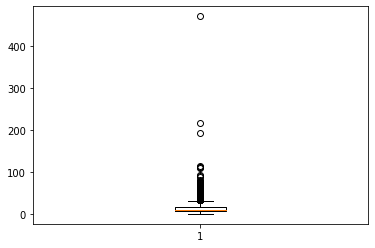

In [54]:
#check the sequences length and detect ouliers. It seems that majrity of reviews are under 200 words
plt.boxplot(length)

In [55]:
#taking sequence length to be 200 and doing padding and truncation for encoded words
MAX_SEQ_LENGTH = 200
X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
X_padded

array([[   0,    0,    0, ...,  677,  116,   62],
       [   0,    0,    0, ...,  111,   36,  446],
       [   0,    0,    0, ..., 2950,  243,  310],
       ...,
       [   0,    0,    0, ...,   80, 2091,  959],
       [   0,    0,    0, ...,    5,   15, 6912],
       [   0,    0,    0, ...,   14, 6913,  214]])

In [56]:
X_padded.shape

(1900, 200)

In [57]:
encoder = LabelEncoder()
encoder.fit(label)

Y = encoder.transform(label)

In [58]:
len(Y)

1900

In [59]:
Y = Y.reshape(-1,1)

In [60]:
Y

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [61]:
Y.shape

(1900, 1)

In [62]:
# use Keras' to_categorical function to one-hot encode Y
Y = to_categorical(Y)

In [63]:
# print Y of the first output sequqnce
print(Y.shape)

(1900, 2)


In [64]:
Y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### Test Validation Split

In [65]:
# split entire data into training and testing sets
TEST_SIZE = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=TEST_SIZE, random_state=4)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1520, 200)
(380, 200)
(1520, 2)
(380, 2)


### LSTM Model

In [67]:
# create architecture

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim     = vocab+1,         # vocabulary size - number of unique words in data
                         output_dim    = EMBEDDING_SIZE,          # length of vector with which each word is represented
                         input_length  = MAX_SEQ_LENGTH,          # length of input sequence
                         weights       = [word_embedding_matrix],     # word embedding matrix
                         trainable     = True                     # True - update embeddings_weight matrix
))

lstm_model.add(Dropout(0.5))

lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dense(128, activation='sigmoid'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(NUM_CLASSES, activation='sigmoid'))

In [68]:
optimizer = keras.optimizers.Adam(lr=0.01)
lstm_model.compile(loss      =  'binary_crossentropy',
                  optimizer =  optimizer,
                  metrics   =  ['acc'])
# check summary of the model
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 300)          2074200   
_________________________________________________________________
dropout (Dropout)            (None, 200, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                42624     
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 2,121,306
Trainable params: 2,121,306
Non-trainable params: 0
______________________________________________

In [69]:
lstm_training = lstm_model.fit(X_train, Y_train, batch_size=64, epochs=25, shuffle = True,validation_data=(X_test, Y_test))

Epoch 1/25
24/24 [==============================] - 7s 299ms/step - loss: 0.6862 - acc: 0.5921 - val_loss: 0.5699 - val_acc: 0.6816
Epoch 2/25
24/24 [==============================] - 11s 457ms/step - loss: 0.2951 - acc: 0.8895 - val_loss: 0.8740 - val_acc: 0.6816
Epoch 3/25
24/24 [==============================] - 7s 304ms/step - loss: 0.0537 - acc: 0.9836 - val_loss: 1.1311 - val_acc: 0.6947
Epoch 4/25
24/24 [==============================] - 6s 257ms/step - loss: 0.0154 - acc: 0.9974 - val_loss: 1.3643 - val_acc: 0.6947
Epoch 5/25
24/24 [==============================] - 5s 209ms/step - loss: 0.0042 - acc: 0.9980 - val_loss: 1.6899 - val_acc: 0.6947
Epoch 6/25
24/24 [==============================] - 5s 226ms/step - loss: 0.0053 - acc: 0.9993 - val_loss: 1.7600 - val_acc: 0.7000
Epoch 7/25
24/24 [==============================] - 6s 269ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.8147 - val_acc: 0.7053
Epoch 8/25
24/24 [==============================] - 7s 271ms/step - loss: 8

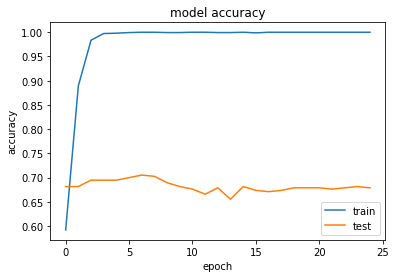

In [70]:
# visualise training history
plt.plot(lstm_training.history['acc'])
plt.plot(lstm_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [71]:
Y_pred = lstm_model.predict(X_test)

In [72]:
Y_pred.shape

(380, 2)

In [73]:
score,acc = lstm_model.evaluate(X_test, Y_test, verbose = 2, batch_size = 64)

6/6 - 0s - loss: 2.2674 - acc: 0.6789


In [74]:
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 2.27
acc: 0.68


In [75]:
test = pd.read_csv('test.csv')
test

,id,text
0,0,it's not like I haven't been talking about it ...
1,1,"With a modern data center, you can cut costs a..."
2,2,"In today's storage landscape, there is a myria..."
3,3,I hoped that it could be done via GUI. I didn...
4,4,math final tomorrow...im getting an ulcer over it
...,...,...
206,206,Strategies & best practices to successfully ac...
207,207,So... if you have \\*more\\* machines that nee...
208,208,Yes. If the vms are on the same host. It's a...
209,209,"@jfrappier @BostonVMUG Sorry, can't make it :(..."


In [76]:
test_list = test['text'].tolist()
test_list

["it's not like I haven't been talking about it for 6-8 years on my own blog.",
 'With a modern data center, you can cut costs and improve #security. Join us in Houston tomorrow to learn more. http://bit.ly/2tH4MXR',
 "In today's storage landscape, there is a myriad of choices! Find out why #VMware managed storage is your answer:  http://bit.ly/2VuMzKn",
 "I hoped that it could be done via GUI.  I didn't even know about PowerCLI, but I'll try it [I'm a total newb, so not sure if I'll succeed].  I just can't understand why such an obviously demanded feature is not in the box...  Thanks for your help.",
 'math final tomorrow...im getting an ulcer over it',
 "Huh... I wasn't expecting that to show up on Twitter.. Time to fix that. :(",
 'With the labs available online now I took the approach of not doing any at vm world and use that time for more sessions last year.',
 "My findings were mismatched MTU settings on the switch or storage.  I didn't have the time to figure out the exact culpr

In [77]:
len(test_list)

211

In [78]:
type(test_list[0])

str

In [79]:
test_sents=[]
for sent in test_list:
    test_sents.append(clean_text(sent))
    
test_sents

[['like', 'talking', '6', '8', 'years', 'blog'],
 ['modern',
  'data',
  'center',
  'cut',
  'costs',
  'improve',
  'security',
  'join',
  'us',
  'houston',
  'tomorrow',
  'learn',
  'http',
  '//bit',
  'ly/2th4mxr'],
 ['today',
  'storage',
  'landscape',
  'myriad',
  'choices',
  'find',
  'vmware',
  'managed',
  'storage',
  'answer',
  'http',
  '//bit',
  'ly/2vumzkn'],
 ['hoped',
  'could',
  'done',
  'via',
  'gui',
  'even',
  'know',
  'powercli',
  'try',
  'total',
  'newb',
  'sure',
  'succeed',
  'understand',
  'obviously',
  'demanded',
  'feature',
  'box',
  'thanks',
  'help'],
 ['math', 'final', 'tomorrow', 'im', 'getting', 'ulcer'],
 ['huh', 'expecting', 'show', 'twitter', 'time', 'fix'],
 ['labs',
  'available',
  'online',
  'took',
  'approach',
  'vm',
  'world',
  'use',
  'time',
  'sessions',
  'last',
  'year'],
 ['findings',
  'mismatched',
  'mtu',
  'settings',
  'switch',
  'storage',
  'time',
  'figure',
  'exact',
  'culprit',
  'parts',
  '

In [82]:
word_tokenizer = Tokenizer() 
word_tokenizer.fit_on_texts(test_sents)
Test_encoded = word_tokenizer.texts_to_sequences(test_sents)
Test_encoded

[[13, 125, 5, 531, 70, 272],
 [532, 94, 273, 533, 534, 274, 275, 276, 95, 535, 96, 277, 1, 11, 536],
 [53, 28, 537, 538, 539, 71, 8, 540, 28, 126, 1, 11, 541],
 [542,
  23,
  97,
  127,
  278,
  39,
  18,
  174,
  98,
  543,
  544,
  54,
  545,
  72,
  279,
  546,
  280,
  547,
  19,
  548],
 [549, 550, 96, 175, 176, 551],
 [552, 553, 73, 177, 14, 281],
 [554, 74, 178, 179, 555, 4, 556, 29, 14, 557, 99, 282],
 [558,
  559,
  560,
  283,
  128,
  28,
  14,
  284,
  561,
  562,
  563,
  564,
  565,
  566,
  567,
  47,
  285,
  3,
  286,
  75,
  287,
  288,
  568,
  569,
  289,
  570,
  290,
  571],
 [291, 2, 129],
 [572, 573, 30, 574, 20, 575, 76, 576],
 [180, 577, 578, 181, 579],
 [292, 580, 581, 293, 24, 292, 30, 294, 130, 582, 182, 10, 583],
 [295, 584, 585, 100, 586, 183, 296, 71, 131, 297],
 [587,
  588,
  589,
  590,
  54,
  591,
  6,
  21,
  298,
  19,
  299,
  132,
  3,
  300,
  592,
  55,
  298,
  301,
  593,
  302,
  301,
  14,
  77,
  594],
 [595,
  184,
  40,
  596,
  18,
  1

In [83]:
#taking sequence length to be 200 and doing padding and truncation for encoded words
MAX_SEQ_LENGTH = 200
Test_encoded = pad_sequences(Test_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Test_encoded

array([[   0,    0,    0, ...,  531,   70,  272],
       [   0,    0,    0, ...,    1,   11,  536],
       [   0,    0,    0, ...,    1,   11,  541],
       ...,
       [   0,    0,    0, ..., 1649, 1650, 1651],
       [   0,    0,    0, ...,   66, 1654,   96],
       [   0,    0,    0, ...,  267,   74, 1655]])

In [88]:
Test_pred = lstm_model.predict(Test_encoded)

In [89]:
Test_pred

array([[4.38856514e-05, 9.99955177e-01],
       [9.98731434e-01, 1.28996372e-03],
       [9.99935389e-01, 6.54563773e-05],
       [2.75164843e-04, 9.99706089e-01],
       [9.99915242e-01, 8.73192475e-05],
       [9.99629498e-01, 3.88383865e-04],
       [9.99960184e-01, 3.91780413e-05],
       [9.38931108e-03, 9.90540862e-01],
       [9.91854191e-01, 8.54793191e-03],
       [4.41435041e-05, 9.99955177e-01],
       [9.99951601e-01, 4.84428238e-05],
       [8.77138019e-01, 1.31227076e-01],
       [9.79032159e-01, 2.24926472e-02],
       [5.00181886e-05, 9.99947309e-01],
       [1.22353435e-03, 9.98621285e-01],
       [4.80017079e-05, 9.99951482e-01],
       [9.99082088e-01, 9.87231731e-04],
       [6.20726933e-05, 9.99931812e-01],
       [4.32712040e-05, 9.99956727e-01],
       [4.82220858e-05, 9.99950647e-01],
       [9.99907553e-01, 9.53848939e-05],
       [1.26212835e-04, 9.99867916e-01],
       [9.08080401e-05, 9.99902248e-01],
       [5.67518618e-05, 9.99940395e-01],
       [1.273453

In [94]:
test_df = pd.DataFrame(Test_pred)
test_df

,0,1
0,0.000044,0.999955
1,0.998731,0.001290
2,0.999935,0.000065
3,0.000275,0.999706
4,0.999915,0.000087
...,...,...
206,0.000287,0.999686
207,0.963768,0.035937
208,0.001050,0.998915
209,0.999952,0.000048


In [93]:
test_df.to_csv('test_results.csv')

In [99]:
pd.DataFrame(lstm_model.predict(X_train))

,0,1
0,0.999952,0.000048
1,0.999962,0.000037
2,0.000040,0.999960
3,0.999936,0.000065
4,0.999941,0.000060
...,...,...
1515,0.999957,0.000042
1516,0.999968,0.000031
1517,0.999960,0.000039
1518,0.000041,0.999959


In [100]:
Y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)